   age  fnlwgt  education_num  capital_gain  capital_loss  hours_per_week  \
0   39   77516             13          2174             0              40   
1   50   83311             13             0             0              13   
2   38  215646              9             0             0              40   
3   53  234721              7             0             0              40   
4   28  338409             13             0             0              40   

   income_level  
0             0  
1             0  
2             0  
3             0  
4             0  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   age             48842 non-null  int64
 1   fnlwgt          48842 non-null  int64
 2   education_num   48842 non-null  int64
 3   capital_gain    48842 non-null  int64
 4   capital_loss    48842 non-null  int64
 5   

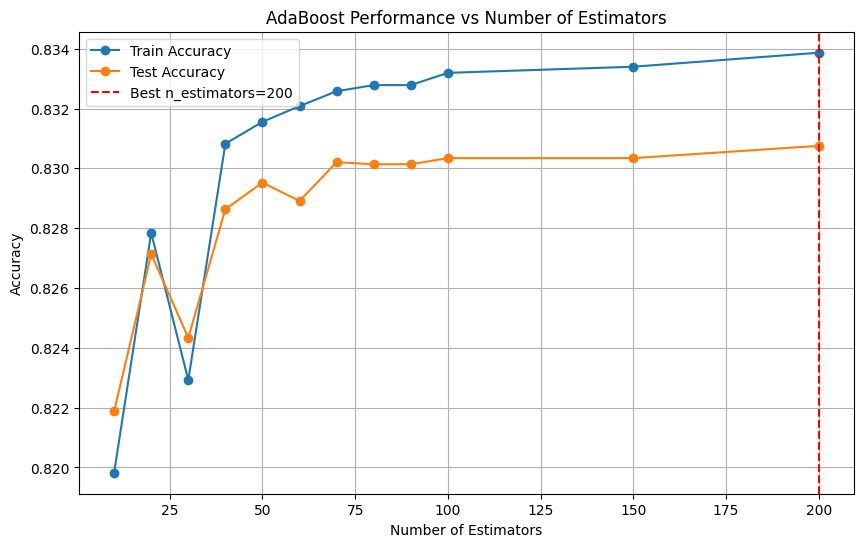


Final Model Performance:
Accuracy: 0.8307513819695626

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     11147
           1       0.77      0.42      0.54      3506

    accuracy                           0.83     14653
   macro avg       0.80      0.69      0.72     14653
weighted avg       0.82      0.83      0.81     14653


Feature Importances:
capital_gain      0.262225
age               0.257600
capital_loss      0.203676
education_num     0.182407
hours_per_week    0.088784
fnlwgt            0.005308
dtype: float64


In [7]:
import pandas as pd
import numpy as np
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('income.csv')

# Explore the dataset
print(data.head())
print("\nDataset info:")
print(data.info())
print("\nClass distribution:")
print(data['income_level'].value_counts())

# Split into features and target
X = data.drop('income_level', axis=1)
y = data['income_level']

# Encode categorical features (one-hot encoding)
X = pd.get_dummies(X)

# Check for missing values
if X.isnull().sum().sum() > 0:
    print("Missing values found. Filling missing values with column mean.")
    X = X.fillna(X.mean())

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y)

# Define base estimator
base_estimator = DecisionTreeClassifier(max_depth=1)  # Stump tree for AdaBoost

# Initial AdaBoost model with 10 estimators
ada_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=10,
    random_state=42
)

# Train the model
ada_model.fit(X_train, y_train)

# Make predictions
y_pred = ada_model.predict(X_test)

# Evaluate initial model
print("\nInitial Model with 10 estimators:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Fine-tune the number of trees
n_estimators_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200]
train_scores = []
test_scores = []

for n in n_estimators_range:
    model = AdaBoostClassifier(
        estimator=base_estimator,
        n_estimators=n,
        random_state=42
    )
    model.fit(X_train, y_train)

    # Training accuracy
    train_pred = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_pred)
    train_scores.append(train_acc)

    # Test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_scores.append(test_acc)

    print(f"n_estimators: {n}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}")

# Find the best number of estimators
best_n = n_estimators_range[np.argmax(test_scores)]
best_score = max(test_scores)

print(f"\nBest performance: n_estimators={best_n} with test accuracy of {best_score:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(n_estimators_range, train_scores, label='Train Accuracy', marker='o')
plt.plot(n_estimators_range, test_scores, label='Test Accuracy', marker='o')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.title('AdaBoost Performance vs Number of Estimators')
plt.axvline(x=best_n, color='r', linestyle='--', label=f'Best n_estimators={best_n}')
plt.legend()
plt.grid()
plt.show()

# Train final model with best number of estimators
final_model = AdaBoostClassifier(
    estimator=base_estimator,
    n_estimators=best_n,
    random_state=42
)
final_model.fit(X_train, y_train)

# Evaluate final model
final_pred = final_model.predict(X_test)
print("\nFinal Model Performance:")
print("Accuracy:", accuracy_score(y_test, final_pred))
print("\nClassification Report:")
print(classification_report(y_test, final_pred))

print("\nFeature Importances:")
feature_importances = pd.Series(final_model.feature_importances_, index=X.columns)
print(feature_importances.sort_values(ascending=False))
